<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_5_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Gaussian Naive Bayes

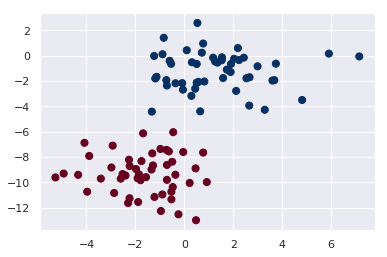

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

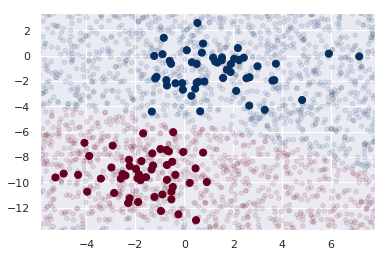

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [0]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

#Multinomial Naive Bayes

In [0]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [0]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

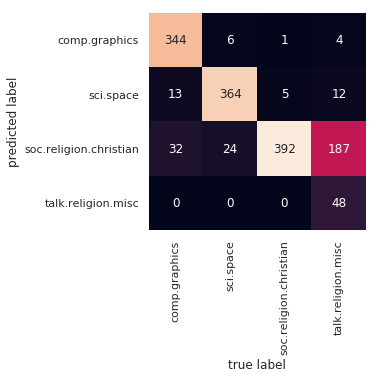

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [0]:
predict_category('sending a payload to the ISS')

'sci.space'

In [0]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [0]:
predict_category('determining the screen resolution')

'comp.graphics'

#When to Use Naive Bayes

*  It is are extremely fast for both training and prediction
*  It provides straightforward probabilistic prediction
*  It is often very easily interpretable
*  It has very few (if any) tunable parameters

*  When the naive assumptions actually match the data (very rare in practice)
*  For very well-separated categories, when model complexity is less important
*  For very high-dimensional data, when model complexity is less important

#Experiments

In [0]:
ones_and_zeros = '''
0100101011101010101000101110100101010101
0100001010101001010101010010100101010010001010101010010100101010010
'''

In [0]:
import numpy as np

class Predictor():
  def __init__(self, Nmax, D):
    self.history = [0 for _ in range(D-1)]
    self.stats = np.ones(Nmax**D).reshape([Nmax]*D)
    self.D = D
    
  def best_guess(self):
    cond_stats = self.stats[tuple(self.history)] if self.D > 1 else self.stats
    return np.argmax(cond_stats)
  
  def update(self, num):
    if self.D <= 1:
      self.stats[num] += 1
    else:
      self.stats[tuple(self.history)][num] += 1
      self.history = self.history[1:] + [num]

    
class BayesGuesser:
  def __init__(self, Nmax):
    self.predictors = [Predictor(Nmax, D) for D in [1,2,3]]
    self.guesses = np.array([1, 1, 1])
    self.misses = np.array([1, 1, 1])
    
  def best_guess(self):
    stats = self.guesses / (self.guesses + self.misses)
    return self.predictors[np.argmax(stats)].best_guess()
  
  def update(self, num):
    for idx in range(3):
      if num == self.predictors[idx].best_guess():
        self.guesses[idx] += 1
      else:
        self.misses[idx] += 1
      self.predictors[idx].update(num)
      
      
ones_and_zeros = ''.join(ones_and_zeros.split())
data = [int(i) for i in ones_and_zeros]

bg = BayesGuesser(2)
for e in data:
  bg.update(e)


In [3]:
import IPython
from google.colab import output

_const_guess = '''
<br> My guess is: %s <br>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Guessed\', [%s], {})\"> Correct </button>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Missed\', [%s], {})\"> No </button>
'''

stat_correct = 0
stat_missed = 0

def guessed_click(number):
  global stat_correct
  stat_correct += 1
  bg.update(int(number))
  do_guess()

def missed_click(number):
  global stat_missed
  stat_missed += 1
  bg.update(1 - int(number))
  do_guess()
  
def do_guess():
  number = bg.best_guess()
  output.clear()
  display(IPython.display.HTML(_const_guess % (str(number), str(number), str(number))))
  output.register_callback('notebook.Guessed', guessed_click)
  output.register_callback('notebook.Missed', missed_click)
  print("stats: correct = ", stat_correct, ", misses = ", stat_missed)
  
do_guess()

stats: correct =  9 , misses =  24
